<b>Дерево решений</b> - ужасно переобученный алгоритм <br>
<b>min_sample_split</b> - какой размер выборки мы будем считать минимально допустимым чтобы сделать по нему split (если в прямоугольнике меньше 100 наблюдений то дальше сплит не происходит) <br>
Нельзя перебрать все параметры, можно брать их с каким-то шагом или из подвыборки

<i> Oбернем слабость дерева решений в его силу! </i> <br><br>
Например, посадим 4 дерева решений и далее  <br>
1му дереву решений дадим посмотреть только на подвыборку из всех данных <br>
2му только тоже часть но с другими переменными и другими строками <br>
... <br>
Запускаем кросс-валидацию и обучение. Каждое дерево дало какое-то предсказание(вероятность отнесения к классу).<br>
Если усреднить эту вероятность будет более точное значение.
Выше описан <b>Random Forest</b>. <br>
Деревья на самом деле все одинаковые по набору параметров, разные только датасеты.<br>
bootstrap - будут ли повторения?

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
c
titanic_data.isnull().sum()
X = titanic_data.drop(['PassengerId','Name','Ticket','Cabin','Survived'], axis=1)
X = pd.get_dummies(X)
X = X.fillna({'Age':X.Age.median()})
X.isnull().sum()
y = titanic_data.Survived

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [5]:
clf_rf = RandomForestClassifier()
parametrs = {'n_estimators': [10,20,30], 'max_depth': [2,5,7,10]}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 10}

### 3.2.8
import pandas as pd<br>
from sklearn.ensemble import RandomForestClassifier<br>

rf = RandomForestClassifier(n_estimators= 15, max_depth= 5)<br>
rf.fit(x_train, y_train)<br>
predictions = rf.predict(x_test)<br>

In [16]:
best_clf = grid_search_cv_clf.best_estimator_
#лучшие фичи приводящие к большим изменениям
feature_importances = best_clf.feature_importances_

In [19]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                       'feature_importances':feature_importances})

feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.261599
4,Fare,0.165886
5,Sex_female,0.143731
1,Age,0.138918
0,Pclass,0.126418
2,SibSp,0.054664
3,Parch,0.047604
7,Embarked_C,0.040494
9,Embarked_S,0.014998
8,Embarked_Q,0.005689


При высокой скореллированности нескольких переменных сплит по любой из них может давать одинаковый Information Gain, и выбор будет сделан случайно. То есть, важность фичей может изменяться в зависимости от выбора из равноценных в процессе обучения. Поэтому следует смотреть на корреляцию между переменными перед обучением, чтобы лучше представлять данные.

In [22]:
heart_data = pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
X = heart_data.drop('target', axis=1)
y = heart_data.target

In [45]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)
rf.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [46]:
#лучшие фичи приводящие к большим изменениям
feature_importances = rf.feature_importances_
feature_importances

array([0.04344095, 0.0399895 , 0.1399832 , 0.0535693 , 0.05688662,
       0.00849278, 0.01858343, 0.12954976, 0.04807909, 0.11664461,
       0.06920762, 0.07704782, 0.19852531])

In [47]:
feature_importances_df = pd.DataFrame({'features': list(X),
                                       'feature_importances':feature_importances})

feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
12,thal,0.198525
2,cp,0.139983
7,thalach,0.129550
9,oldpeak,0.116645
11,ca,0.077048
10,slope,0.069208
4,chol,0.056887
3,trestbps,0.053569
8,exang,0.048079
0,age,0.043441


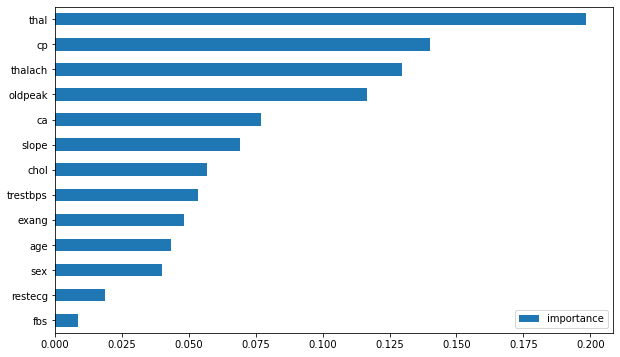

In [50]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(10, 6))